Load Data

In [166]:
import pandas as pd

#kode_saham = ["PBCRF","IBM","PHJMF","PTAIF","TLKMF"]#
#kode_saham = ["PTAIF","TLKMF","AKPI.JK","BATA.JK"]
kode_saham = ["PBCRF","PHJMF","PTAIF","PBCRF","TLKMF"]
n = len(kode_saham)
github = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/Data/"
#data[0] = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/"+data[0]+".csv"
#data[1] = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/BKRKF.csv"
#data[2] = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/PHJMF.csv"
#data[3] = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/PTAIF.csv"
#data[4] = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/TLKMF.csv"

df = []
for i in range(n) :
  datas = pd.read_csv(github+kode_saham[i]+".csv")
  data_tmp = datas["Close"]
  df.append(data_tmp)
  #print(data_tmp.shape)

dataset = pd.concat(df, axis=1, sort=False)
dataset.columns = kode_saham
dataset

,PBCRF,PHJMF,PTAIF,PBCRF,TLKMF
0,1.13,0.31,0.593,1.13,0.27
1,1.13,0.31,0.593,1.13,0.29
2,1.13,0.31,0.593,1.13,0.28
3,1.05,0.29,0.593,1.05,0.26
4,1.12,0.29,0.593,1.12,0.28
...,...,...,...,...,...
100,1.70,0.24,0.480,1.70,0.25
101,1.73,0.25,0.480,1.73,0.27
102,1.70,0.25,0.480,1.70,0.26
103,1.73,0.25,0.480,1.73,0.26


In [174]:
dataset.corr()

,PBCRF,PHJMF,PTAIF,PBCRF,TLKMF
PBCRF,1.000000,0.178279,-0.508943,1.000000,-0.385346
PHJMF,0.178279,1.000000,0.319616,0.178279,-0.094715
PTAIF,-0.508943,0.319616,1.000000,-0.508943,0.577733
PBCRF,1.000000,0.178279,-0.508943,1.000000,-0.385346
TLKMF,-0.385346,-0.094715,0.577733,-0.385346,1.000000


In [186]:
import numpy as np
dataset = dataset.dropna()
#print(type(dataset.corr()))
list_corr = []
for x in dataset:
  print(type(dataset.corr()[x]))
  #print(dataset[x].corr())
  #list_corr.append(dataset[x].corr().tolist())
  #print(dataset.corr()[x].tolist())
#rho = np.array(list_corr)
#print(rho)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [172]:
import statistics as st
var = []
for x in dataset :
  tmp = dataset[x].tolist()
  var.append(st.variance(tmp))
#print(var)
df_var = pd.DataFrame([var])
df_var.columns = kode_saham
df_var

AttributeError: ignored


# Multi sekuritas


In [139]:
import numpy as np

std_dev = []
for i in var :
  std_dev.append(np.sqrt(i))
n = len(std_dev)

u = np.ones(n)
"""#print(u)
#rho = np.zeros((n,n))
#rho[0][1] = 0.1

#rho[0][2] = 0.2
#rho[0][3] = 0.2
#rho[0][4] = 0.2
#rho[1][2] = 0.2
#rho[1][3] = 0.2
#rho[1][4] = 0.2
#rho[2][3] = 0.2
#rho[2][4] = 0.2
#rho[3][4] = 0.2

for i in range(n) :
  for j in range(n) :
    if j == i :
      rho[i][j] = 1
    elif j < i :
      rho[i][j] = rho[j][i]
print(rho)"""

'#print(u)\n#rho = np.zeros((n,n))\n#rho[0][1] = 0.1\n\n#rho[0][2] = 0.2\n#rho[0][3] = 0.2\n#rho[0][4] = 0.2\n#rho[1][2] = 0.2\n#rho[1][3] = 0.2\n#rho[1][4] = 0.2\n#rho[2][3] = 0.2\n#rho[2][4] = 0.2\n#rho[3][4] = 0.2\n\nfor i in range(n) :\n  for j in range(n) :\n    if j == i :\n      rho[i][j] = 1\n    elif j < i :\n      rho[i][j] = rho[j][i]\nprint(rho)'

In [140]:
def is_short_selling(rho,std_dev):
  n = len(rho)
  print(n)
  check = False
  #rho = rho.sort()
  std_Dev =std_dev.sort()

  for i in range(n):
    for j in range(n):
      if i < j :
        x = std_dev[i]/std_dev[j]
        #print(rho[i][j])
        if rho[i][j] > x :
          check =True
          break
  return check

is_short_selling(rho,std_dev)

5


True

In [141]:
C = (np.zeros((n,n)))

for i in range(n):
  for j in range(n) :
    C[i][j] = std_dev[i]*rho[i][j]*std_dev[j]
print(C)

[[ 1.03882562e-03  2.52187447e-04 -9.69266842e-04 -2.22510320e-03
  -1.02766508e+00]
 [ 2.52187447e-04  1.92621359e-03  8.28866088e-04 -2.33609680e-03
  -3.43953483e-01]
 [-9.69266842e-04  8.28866088e-04  3.49145246e-03  2.29331393e-03
   2.82461414e+00]
 [-2.22510320e-03 -2.33609680e-03  2.29331393e-03  3.42325712e-02
   4.98104990e+00]
 [-1.02766508e+00 -3.43953483e-01  2.82461414e+00  4.98104990e+00
   6.84633822e+03]]


In [142]:
from numpy.linalg import inv
from numpy.linalg import det
u = np.ones(n)
uT = np.transpose(u)

CInv = inv(C)

w = np.dot(u,CInv)/(u.dot(CInv).dot(uT))
print(w)

[ 6.50148201e-01  1.29753283e-02  2.95368057e-01  4.15622197e-02
 -5.38056359e-05]


In [143]:
#w = np.array([0.3,0.4])
wT = np.transpose(w)
x = np.dot(u,wT)
print("jumlah w = ",x)

jumlah w =  1.0000000000000002


In [144]:
risk = w.dot(C).dot(wT)
print(risk)

0.000355186302008042


Expected return saham


In [0]:
import math
def find_ud(saham) :
  K = []
  
  
  for i in range(len(saham)-1) :
    x = (saham[i+1]-saham[i])/saham[i]
    K.append(x)
  up = []
  down = []

  for i in K :
    if i > 0 :
      x = 1
      y = 0
    else :
      x = 0
      y = 1
    up.append(x)
    down.append(y)
  
  x_up = 1
  x_down = 1

  sum_u = 0
  sum_d = 0

  for i in range(len(K)) :
    x_up += K[i]*up[i]
    sum_u += up[i]
    x_down += K[i]*down[i]
    sum_d += down[i]
  
  u = x_up/sum_u
  d = x_up/sum_d

  p = sum_u/(sum_u+sum_d)
  q = 1-p

  result = {"u" : u, "d" : d,"p":p,"q":q}
  
  return result

In [0]:
def return_saham(df_saham) :
  result = {}
  for saham in df_saham :
    x = find_ud(df_saham[saham])
    exp = (x["u"]*x["p"])+(x["d"]*x["q"])
    result[saham] = exp
  return result

In [0]:
return_ = return_saham(dataset)
m = []
for saham in return_ :
  m.append(return_[saham])

In [148]:

import pandas as pd

m = np.array(m)
print(m)
EK = m.dot(wT)
print("ekspektasi return = ", EK)
risk = w.dot(C).dot(wT)
print("risk = ",risk)

portfolio=[round(x,4) for x in w]
portfolio.append(EK)
portfolio.append(risk)
print(portfolio)

df_port = pd.DataFrame([portfolio])
column = kode_saham
print(kode_saham)
column.append("Expected Return")
column.append("Risiko")
df_port.columns = column
df_port

[0.04988471 0.0321097  0.03255372 0.08004685 0.08804206]
ekspektasi return =  0.04578660145237723
risk =  0.000355186302008042
[0.6501, 0.013, 0.2954, 0.0416, -0.0001, 0.04578660145237723, 0.000355186302008042]
['PBCRF', 'PHJMF', 'PTAIF', 'AKPI.JK', 'TLKMF']


,PBCRF,PHJMF,PTAIF,AKPI.JK,TLKMF,Expected Return,Risiko
0,0.6501,0.013,0.2954,0.0416,-0.0001,0.045787,0.000355


In [149]:
mT = np.transpose(m)
e_r = EK
w_new = []
list_EK = []
for i in range(4) :
  e_r *= 1.02
  list_EK.append(e_r)
  
  matA = np.dot(u,(CInv))
  matB = np.dot(m,(CInv))
  mat1 = u.dot(CInv).dot(mT)
  mat2 = m.dot(CInv).dot(mT)
  mat3 = u.dot(CInv).dot(uT)
  mat4 = m.dot(CInv).dot(uT)

  A1 = np.array([[1,mat1],[e_r,mat2]]) 
  A2 = np.array([[mat3,1],[mat4,e_r]])
  A3 = np.array([[mat3,mat1],[mat4,mat2]])

  det1 = det([[1,mat1],[e_r,mat2]])
  det2 = det([[mat3,1],[mat4,e_r]])
  det3 = det([[mat3,mat1],[mat4,mat2]])
  w = ((det1*matA)+(det2*matB))/det3
  w_new.append(w)
print(w_new)
print(list_EK)

[array([ 6.86218080e-01, -1.86322459e-02,  2.85083013e-01,  4.73810890e-02,
       -4.99355574e-05]), array([ 7.23009356e-01, -5.08719716e-02,  2.74592268e-01,  5.33163356e-02,
       -4.59880773e-05]), array([ 7.60536457e-01, -8.37564918e-02,  2.63891709e-01,  5.93702873e-02,
       -4.19616477e-05]), array([ 7.98814101e-01, -1.17298702e-01,  2.52977138e-01,  6.55453179e-02,
       -3.78546894e-05])]
[0.046702333481424774, 0.04763638015105327, 0.04858910775407434, 0.049560889909155824]


In [150]:
list_bobot = []
i = 0
for bobot in w_new :
  tmp = []
  wT = np.transpose(bobot)
  risk = bobot.dot(C).dot(wT)
  for x in bobot :
    tmp.append(x)
  tmp.append(list_EK[i])
  tmp.append(risk)
  list_bobot.append(tmp)
  i+=1
print(list_bobot)

df = pd.DataFrame(list_bobot)
df.columns = column
df_tmp =df_port
new_df = df_tmp.append(df,ignore_index=True)
new_df

[[0.6862180795600831, -0.018632245893077617, 0.2850830129232634, 0.047381088967139814, -4.993555740822758e-05, 0.046702333481424774, 0.00036022370596452405], [0.7230093556280021, -0.050871971571042084, 0.2745922683767675, 0.0533163356436089, -4.598807733715966e-05, 0.04763638015105327, 0.0003757409251120695], [0.7605364572172816, -0.08375649176256568, 0.2638917089393425, 0.05937028725360749, -4.196164766467055e-05, 0.04858910775407434, 0.0004023668700658253], [0.7988141008383438, -0.1172987023579198, 0.252977138313168, 0.0655453178958059, -3.7854689398731455e-05, 0.049560889909155824, 0.00044075996995140976]]


,PBCRF,PHJMF,PTAIF,AKPI.JK,TLKMF,Expected Return,Risiko
0,0.650100,0.013000,0.295400,0.041600,-0.000100,0.045787,0.000355
1,0.686218,-0.018632,0.285083,0.047381,-0.000050,0.046702,0.000360
2,0.723009,-0.050872,0.274592,0.053316,-0.000046,0.047636,0.000376
3,0.760536,-0.083756,0.263892,0.059370,-0.000042,0.048589,0.000402
4,0.798814,-0.117299,0.252977,0.065545,-0.000038,0.049561,0.000441


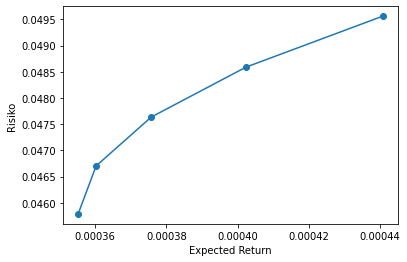

In [151]:
import matplotlib.pyplot as plt

y = new_df["Expected Return"]
x = new_df["Risiko"]

plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel("Expected Return")
plt.ylabel("Risiko")
plt.show()